In [113]:
import json
import os

In [114]:
# store all artist information from the path
ARTIST_FILE = 'C:/Chris Liu/清华/25暑期/python-course/song_curl/saved_info/artist_info/artist_intro'
artist_files = os.listdir(ARTIST_FILE)
artists_info = []
for file in artist_files:
    with open(f"{ARTIST_FILE}/{file}", 'r', encoding='utf-8') as f:
        artist = json.load(f)
        artists_info.append(artist)

In [115]:
# store the length of all the artists' intro block
artists_intro_length = []
for artist in artists_info:
    intro = artist['intro']
    intro_length = len(intro['intro'])
    if intro.get('history') is not None:
        intro_length += len(intro['history'])
    if intro.get('master_work') is not None:
        for work in intro['master_work']:
            intro_length += len(work)
    if intro.get('milestones') is not None:
        for milestone in intro['milestones']:
            intro_length += len(milestone)
    artists_intro_length.append(intro_length)
    

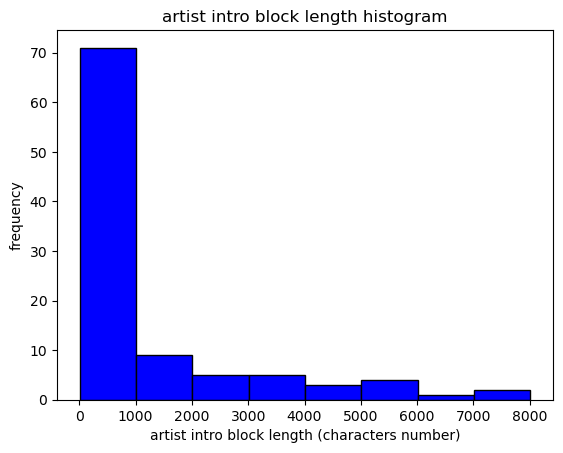

In [116]:
import matplotlib.pyplot as plt

# make a histogram according to the length of the artist intro block
plt.hist(artists_intro_length, bins=8, color='blue', edgecolor='black')
plt.xlabel("artist intro block length (characters number)")
plt.ylabel("frequency")

plt.title("artist intro block length histogram")
plt.show()

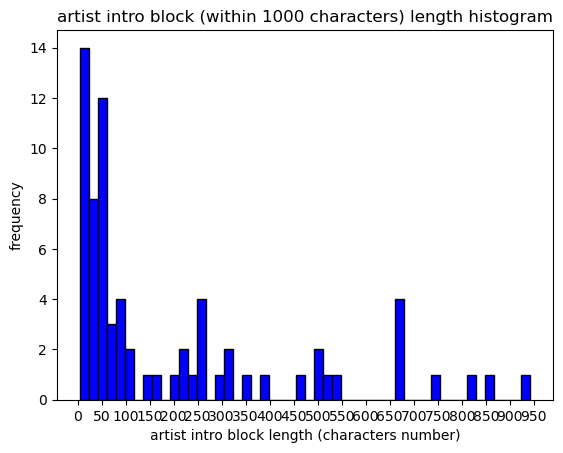

In [117]:
import numpy as np

# since most of the artists have intro within 1000 characters, there's the need
# for finding the distribution of these artists.
artists_intro_within1000 = []
for intro_length in artists_intro_length:
    if intro_length <= 1000:
        artists_intro_within1000.append(intro_length)

plt.hist(artists_intro_within1000, bins=50, color='blue', edgecolor='black')
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel("artist intro block length (characters number)")
plt.ylabel("frequency")
plt.title("artist intro block (within 1000 characters) length histogram")
plt.show()

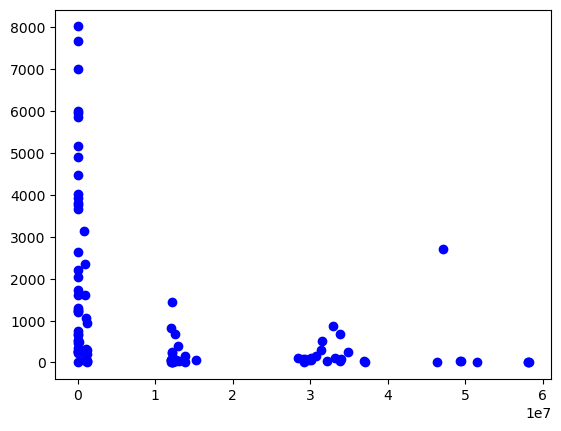

In [118]:
# make a scatter plot according to the length of the artists' intro and their id
artists_intro_length_arr = np.array(artists_intro_length)
artist_ids = []
for artist in artists_info:
    artist_ids.append(artist['id'])
artist_ids_arr = np.array(artist_ids)

plt.scatter(artist_ids, artists_intro_length_arr, marker='o', color='blue')
plt.show()

根据前两幅图我们得知，即便有些歌手的介绍模块的长度有7000到8000个字符，大多数歌手的介绍还是在1000个字符以内。而在1000字符的歌手介绍模块中，大部分介绍在50个字符一下。这说明大部分歌手的介绍模块相较于最长的介绍是很简短的。

在第三幅图中我们可一发现拥有超长介绍的歌手的id都很靠前，但拥有靠后id的歌手的介绍长度和他们的id没有显著关系。根据网站的规律，id靠前的网页一般都先被建好，所一在前几波次被加入网站的歌手更有可能获得超长介绍。当然，一个更可能的推测是在早期，网站并没有开放对民间歌手的注册权限，而只是在添加明星歌手。明星歌手拥有更多的经历和成就来编写介绍，所以他们的介绍模块很长。最终，这导致了只有早期加入网站的歌手有超长介绍的现象。

In [119]:
# store all song information
SONG_FILE = 'C:/Chris Liu/清华/25暑期/python-course/song_curl/saved_info/song_info/song_intro'

song_files = os.listdir(SONG_FILE)
songs_info = []
for file in song_files:
    with open(f"{SONG_FILE}/{file}", "r", encoding="utf-8") as f:
        song = json.load(f)
        songs_info.append(song)

In [120]:
# find out how many artists contribute to each song
song_artist_num = []
for song in songs_info:
    song_artist_num.append(len(song['artist list']))

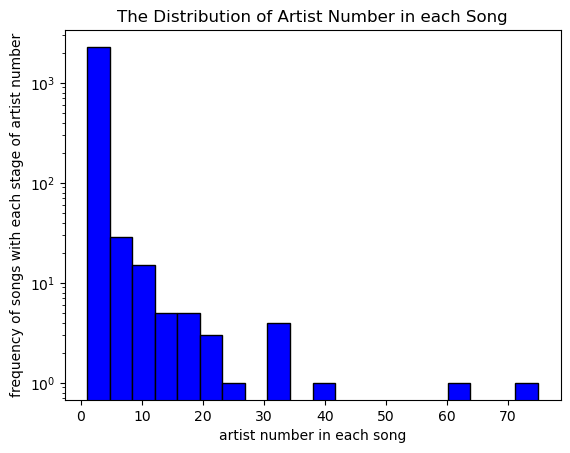

In [121]:
# analyze the data using a hitogram
plt.hist(song_artist_num, bins=20, color='blue', edgecolor='black')
plt.yscale('log')
plt.xlabel('artist number in each song')
plt.ylabel('frequency of songs with each stage of artist number')
plt.title('The Distribution of Artist Number in each Song')
plt.show()

In [122]:
# finding out what are the songs that have the most artists
import pandas as pd

many_artist_songs = sorted(songs_info, key=lambda x: len(x['artist list']), reverse=True)[:10]
table = pd.DataFrame({
    '歌曲名称': [song['name'] for song in many_artist_songs],
    '歌曲别名': [song.get('alias') for song in many_artist_songs],
    '歌手数量': [len(song['artist list']) for song in many_artist_songs],
    '网址': [song['url'] for song in many_artist_songs],
})

table

,歌曲名称,歌曲别名,歌手数量,网址
0,承诺(香港版),“一方有难，八方支援” 两岸三地演艺界5.12关爱行动主题曲,75,https://music.163.com/song?id=5251209
1,手牵手,2003年抗非典公益歌曲,62,https://music.163.com/song?id=5268423
2,我的祖国,None,39,https://music.163.com/song?id=1483514670
3,唱支山歌给党听(青春版),None,34,https://music.163.com/song?id=1863362787
4,微光,None,32,https://music.163.com/song?id=2015889678
5,披荆斩棘,None,32,https://music.163.com/song?id=2074099995
6,送你一朵小红花 (live),None,32,https://music.163.com/song?id=2639690476
7,东方之珠 (Live),None,26,https://music.163.com/song?id=1959134563
8,祝福 (live),None,23,https://music.163.com/song?id=2675072853
9,我的未来不是梦 (Live版),None,20,https://music.163.com/song?id=2030767034


在爬下来的歌曲中，大部分都只有五个以内的歌手参与了演唱。但是，其中也有小部分歌曲有十位以上的歌手参与演唱，有些歌甚至有50位歌手参与。在这些有多位歌手参与演唱的歌中，我选出了前十个并放在了上面的表格里。可以发现，这十首歌大部分都可以被归为三个类别：公益歌曲、爱国或主旋律歌曲、以及歌曲现场版。

In [123]:
# extract all songs' lyrics
songs_lyrics = []
for song in songs_info:
    songs_lyrics.append(song['lyrics'])

In [124]:
# make common words, music words, and puncuations as stop words
base_stopwords = {
    '虽然', '如果', '因为', '所以', '然后', 'to', 'my', '我会', '不想', '可是', '其实', '看到'
    '一些', '一切', '任何', '所有', '每', '某', '哪个', '怎么', '什么', '为什么', '如何', '\n',
    '收起', '我们', 'studio', '不是', '可以', '只是', '想要', '一直', '一样', '就是', '变成', 
    '需要', 'so', '最后', '能够', '也许', '不用', '那个', 'that', 'be', 'you', 'me', '一个',
    '还是', 'with', 'we', 'just', 'in', '里面', '好像', '总是', '他们', '你们', '这个', 'the', 
    '不会', '不能', '还有', '觉得', '只能', '是否', '已经', '没有', '那么', '知道', 'You', 'no', 
    'No', 'Yes', 'yes', 'by', 'By', '无法', '看见', '有些', '不再', '那些', '多么', '有人', 
    '出现', '继续', '一次', '每个', '这里', '只要', '慢慢', '直到', '这样', '为了', '不要'
}

music_stopwords = {
    '歌曲', '歌词', '歌手', '演唱', '唱', '音乐', '专辑', '唱片', '发行', '版本',
    '录制', '制作', '创作', '作曲', '作词', '编曲', '旋律', '节奏', '和弦', '音调',
    '声调', '音高', '节拍', '音符', '副歌', '主歌', '前奏', '间奏', '尾奏', '合唱',
    '独唱', '合声', '声音', '嗓音', '录音', '混音', '母带', '播放', '收听', '聆听',
    '出品人', '监制', '录音师', '人声', '总监', 'Music', '弦乐', '编写', '吉他', 
    'Studio', 'oh', 'Oh', '牛班', 'newband', 'Newband', 'NewBand', 'NEWBAND', 
    '贝斯', '维伴', '工作室', '录音室', '企划', '有限公司', '公司', '网易', '网易云',
    '出品'
}

punctuations = {
    ',', '.', '(', ')', '?', '!', '"', "'", ':', ';', '，', '。', '、',
    '：', '；', '“', '”', '‘', '’', '！', '？', '/', '\\', '&'
}

In [125]:
# counting the appearance of each word in the lyrics
import jieba
from tqdm.auto import tqdm
from collections import defaultdict

word_counts = defaultdict(int)
pbar = tqdm(total=len(songs_lyrics))
stopwords = base_stopwords.union(music_stopwords, punctuations)
for lyrics in songs_lyrics:
    seg_list = jieba.cut(lyrics, cut_all=False)
    for word in seg_list:
        if len(word) > 1 and word not in stopwords:
            word_counts[word] += 1
    pbar.update(1)

word_counts


100%|█████████▉| 2349/2351 [00:19<00:00, 135.41it/s]

defaultdict(int,
            {'简君伟': 8,
             '大为': 29,
             '于京延': 24,
             '回忆': 743,
             '太好': 4,
             '刺青': 1,
             '很难': 30,
             '抹掉': 10,
             '保持': 76,
             '微笑': 198,
             '真的': 663,
             '看到': 321,
             '逃进': 4,
             '汹涌': 62,
             '人潮': 61,
             '寻找': 132,
             '藏身': 4,
             '一角': 9,
             '眼泪': 483,
             '不敢': 303,
             '快要': 106,
             '受不了': 14,
             '忘记': 438,
             '拥抱': 358,
             '曾经': 542,
             '那么样': 3,
             '骄傲': 138,
             '太早': 22,
             '怀抱': 65,
             '苦笑': 16,
             '回过': 15,
             '偷偷': 158,
             '擦掉': 16,
             '抱歉': 108,
             '傻得': 4,
             '不好': 63,
             '记忆': 264,
             '拼图': 6,
             '真心': 154,
             '拼凑': 25,
             '不了': 178,
             '幸福': 379,
    

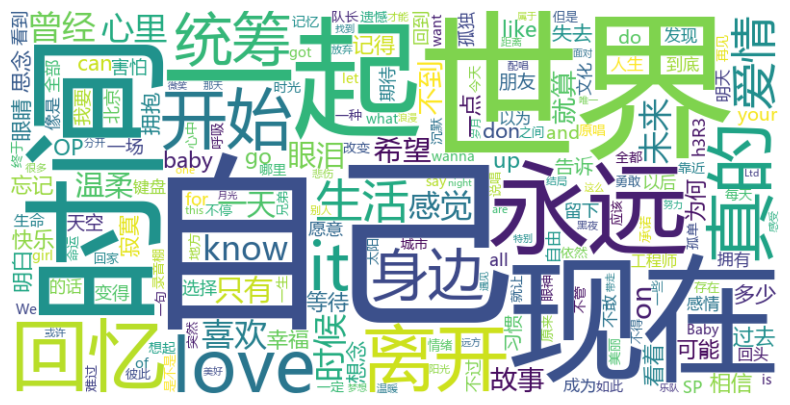

100%|██████████| 2351/2351 [00:30<00:00, 135.41it/s]

In [126]:
from wordcloud import WordCloud

# create word cloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white', 
                      font_path='C:/Windows/Font/msyh.ttc').generate_from_frequencies(word_counts)

# display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

从词云图中可以看出爬到的歌里有很多表达自己的歌（热词：自己）、思索时间的歌（热词：时间、现在、未来、永远）、望向世界的歌（热词：世界）、和回忆过去的歌（热词：回忆、思念、曾经）。歌词中也有多种表达感情和感受的热词，但普通的名词（除了一些没有被删减掉的常用词以外）比较少。